#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [5]:
## Reading the image plaksha_Faculty.jpg
img = cv.imread('plaksha_Faculty.jpg')
  
## Convert the image to grayscale
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(img, 1.05, 4, minSize=(15, 15), maxSize=(45,45))
 
# Define the text and font parameters
text = ("Total number of faces detected are, " + str(len(faces_rect)))
font = cv.FONT_ITALIC  ## Font type
font_scale = 1  ## Font scale factor
font_color = (0, 0, 255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv.putText(img, text, (10, 30), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv.imshow("Total number of faces detected are " + str(len(faces_rect)), img)
cv.waitKey(0)
cv.destroyAllWindows()

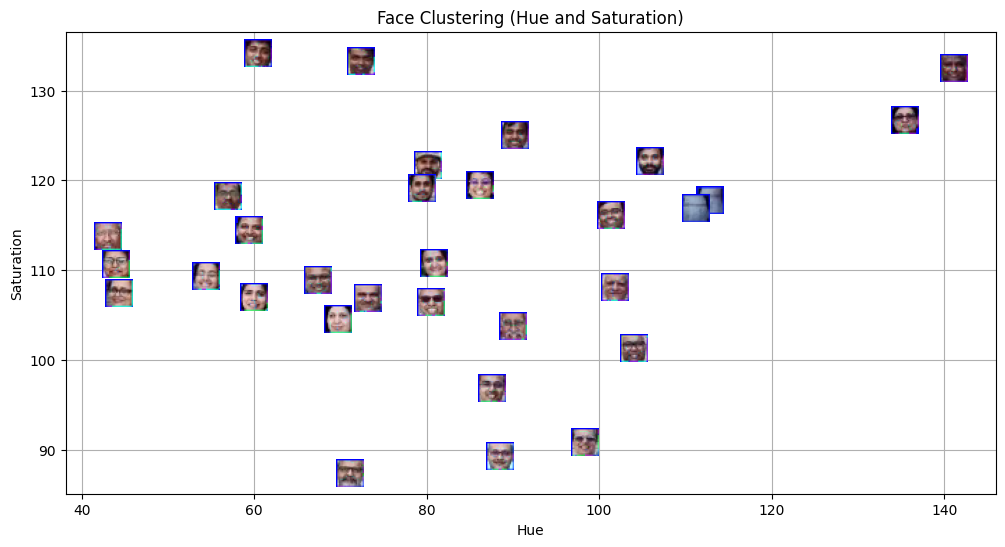

In [6]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv.cvtColor(cv.resize(face_images[i], (20, 20)), cv.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering (Hue and Saturation)")
## Put grid
plt.grid(True)
## show the plot
plt.show()

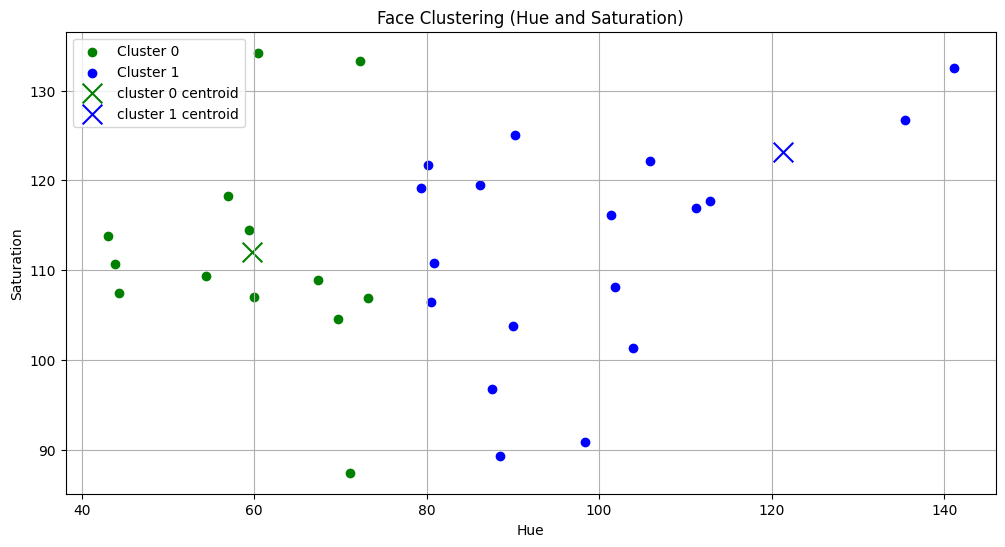

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='green', marker='x', s=200, label='cluster 0 centroid')
plt.scatter(centroid_1[0], centroid_1[1], c='blue', marker='x', s=200, label='cluster 1 centroid')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering (Hue and Saturation)")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## Show the plot
plt.show()

In [8]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img

template_img = cv.imread("Dr_Shashi_Tharoor.jpg")
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(cv.cvtColor(template_img, cv.COLOR_BGR2GRAY), scaleFactor=1.1, minNeighbors=5)
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv.imshow("Template Image with Detected Faces", template_img)
cv.waitKey(0)
cv.destroyAllWindows()      

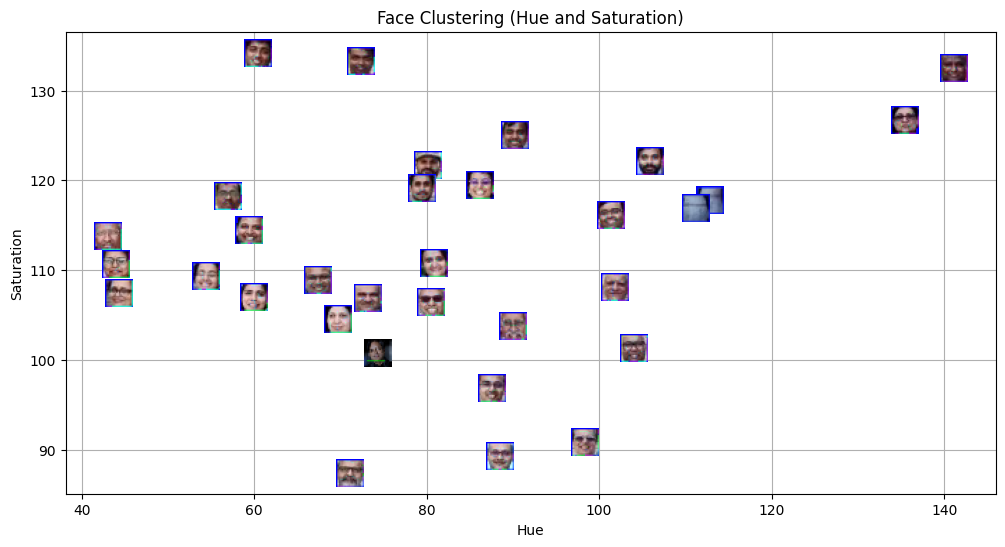

In [11]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv.cvtColor(template_img, cv.COLOR_BGR2HSV) ## call the template_img and convert it from BGR to HSV and store in template_hsv
template_hsv = template_hsv[template_hsv[:, :, 2] > 0]  # Remove black pixels

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, 0])
template_saturation = np.mean(template_hsv[:, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv.cvtColor(cv.resize(face_images[i], (20, 20)), cv.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv.cvtColor(cv.resize(template_img, (20, 20)), cv.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering (Hue and Saturation)")
## Add grid
plt.grid(True)
## show plot
plt.show()

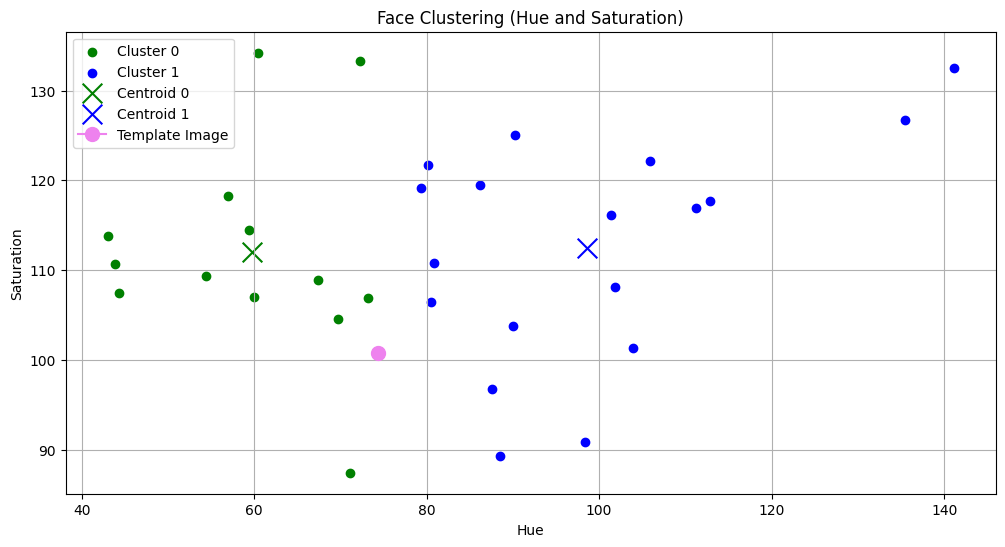

In [12]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='green', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='blue', s=200, label='Centroid 1')
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label='Template Image' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face Clustering (Hue and Saturation)")
## Add a legend
plt.legend()
## Add grid
plt.grid(True)
## show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Ans: Minkowski Distance and Manhattan distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
Ans: Anomaly detectiona and recommendation systems

#### 3. Explain various distance metrics. 
Ans: Manhattan Distance is used by measuing horizontal and vertical distances made with respect to a point. Minkowski Distance is a distance metric which include Euclidean Distance and Manhattan Distance

#### 4. What is the role of cross validation in model performance? 
Ans: Cross-validation evaluates a model's performance on unseen data and prevents overfitting

#### 5. Explain variance and bias in terms of KNN? 
Ans: A low value of K leads to high variance, as the model aligns well with training data. A high value of K results in greater bias, making predictions based on very commmon cases only.